In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1) a. Create a CSV file with sample data.
b. Write a Python function program to:
Find the fitted simple linear and polynomial regression equations for the given data.
c. Compare the coefficients obtained from manually intuitive and matrix formulation methods with
your program.
d. Plot the scatterplot of the raw data and then another scatterplot with lines pertaining to a linear fit
and a quadratic fit overlayed.
e. Compute the error, MSE, and RMSE.

In [86]:
df=pd.read_csv("temp_data.csv")
X=df['Temp.']
y=df['Yield']

In [105]:
# #Polynomial Regression of degree 2
# A = np.array([
#     [len(X), np.sum(X), np.sum(X**2)],
#     [np.sum(X), np.sum(X**2), np.sum(X**3)],
#     [np.sum(X**2), np.sum(X**3), np.sum(X**4)]
# ])
# Y = np.array([
#     [np.sum(y)],
#     [np.sum(X*y)],
#     [np.sum((X**2)*y)]
# ])
# b0,b1,b2=np.linalg.inv(A).dot(Y)
# print(f"Weights: \nb0:{b0} \nb1:{b1} \nb2:{b2}")
# y_pred = b0 + b1*X + b2*(X**2)
# rmse = np.sqrt(np.mean((y - y_pred) ** 2))
# print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")
colors = [
    'blue',    # Classic blue
    'red',     # Bright red
    'green',   # Vibrant green
    'orange',  # Warm orange
    'purple'   # Rich purple
]

def poly_deg(X,y,deg, graph=True):
    A=np.zeros((deg+1,deg+1))
    Y=np.zeros((deg+1))
    Xcess=np.zeros((deg+1, len(X)))

    for power in range(deg+1):
        for i in range(deg+1):
            A[power][i]=np.sum(X**(power+i))
        Y[power]=np.sum(y*(X**(power)))
        Xcess[power] = X**power

    beta = np.linalg.inv(A).dot(Y)
    y_pred = beta.dot(Xcess)
    error = np.mean(np.abs(y-y_pred))
    mse = np.mean((y - y_pred) ** 2)
    rmse = np.sqrt(mse)
    if graph:
        plt.plot(X, y_pred, label=f'Degree:{deg}')

    return error,beta,rmse


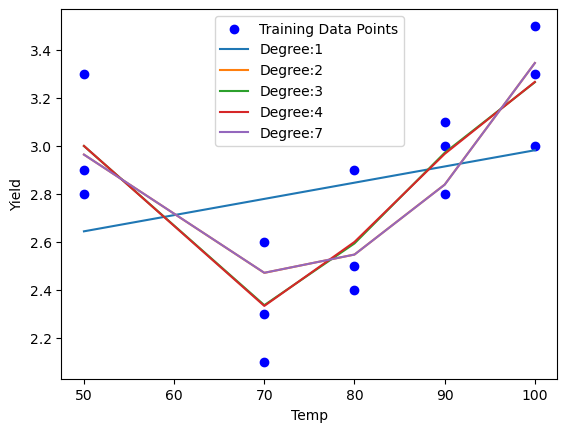

In [113]:
plt.scatter(X, y, color='blue', label='Training Data Points')
poly_deg(X,y,1)
poly_deg(X,y,2)
poly_deg(X,y,3)
poly_deg(X,y,4)

plt.xlabel('Temp')
plt.ylabel('Yield')
plt.legend()
plt.show()

In [114]:

_,beta, rmse = poly_deg(X,y,1, False)
print(f"Weights: \nb0:{beta[0]} \nb1:{beta[1]}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse}")


Weights: 
b0:2.306306306306297 
b1:0.00675675675675691
Root Mean Squared Error (RMSE) on Test Data: 0.3642920651190588


2) a. Create a CSV file with sample data.
b. Write a Python function program to:
c. Find the fitted multiple linear regression equation for the given data.
d. Compare the coefficients obtained manually using intuitive and matrix formulation methods with
your program.
e. Plot the data adorned with the estimated regression equation.
f. Compute the error, MSE, and RMSE.

In [125]:
df=pd.read_csv('myocardial_infarction.csv')
X = df[['Area','X2','X3']]
y = df['Infarc']
X = np.c_[np.ones(X.shape[0]), X]  # Adding a column of ones for intercept
y=y.to_numpy()

X_transpose = X.T
A = np.zeros((X.shape[1], X.shape[1]))
Y = X_transpose.dot(y) 
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        A[i, j] = np.sum(X[:, i] * X[:, j])
beta = np.linalg.inv(A).dot(Y)
print(A)
print(beta)


[[32.     31.82   11.     11.    ]
 [31.82   33.5768 11.     12.02  ]
 [11.     11.     11.      0.    ]
 [11.     12.02    0.     11.    ]]
[-0.13453638  0.61265498 -0.24348223 -0.06565569]


[ 0.07376631  0.25756281  0.3310814   0.37396725  0.31270175  0.3678407
  0.44748585  0.5148779   0.60064959  0.76606644 -0.10845042  0.09372572
  0.17337087  0.27752221  0.24076291  0.25301601  0.33266116  0.36329391
  0.35716736  0.36942046  0.22850981  0.27155226  0.44309565  0.4492222
  0.424716    0.40633635  0.39408325  0.4859815   0.55337355  0.52886735
  0.547247    0.65752489]


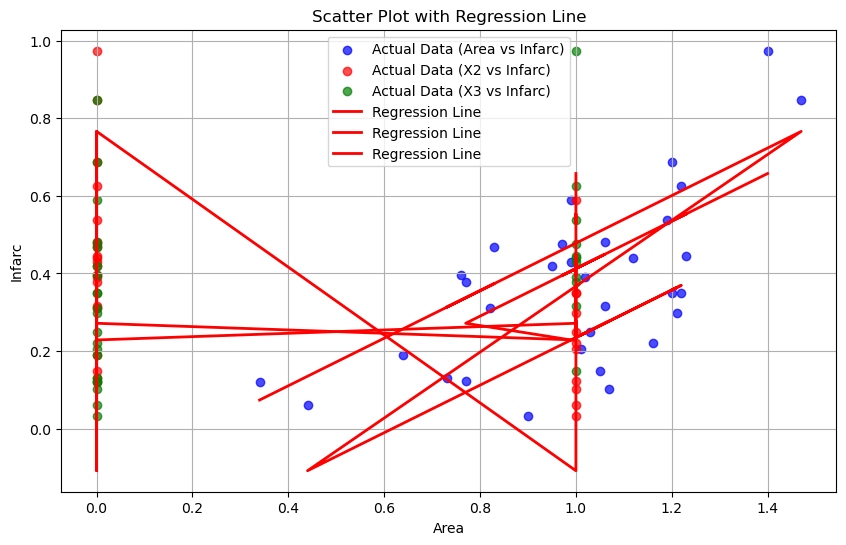

In [136]:
y_pred = X.dot(beta)
print(y_pred)
plt.figure(figsize=(10, 6))

# Scatter plot of the original data
plt.scatter(df['Area'], y, color='blue', label='Actual Data (Area vs Infarc)', alpha=0.7)
plt.scatter(df['X2'], y, color='red', label='Actual Data (X2 vs Infarc)', alpha=0.7)
plt.scatter(df['X3'], y, color='green', label='Actual Data (X3 vs Infarc)', alpha=0.7)

# Plot regression line
plt.plot(df['Area'], y_pred, color='red', label='Regression Line', linewidth=2)
plt.plot(df['X2'], y_pred, color='red', label='Regression Line', linewidth=2)
plt.plot(df['X3'], y_pred, color='red', label='Regression Line', linewidth=2)

# Labels and title
plt.xlabel('Area')
plt.ylabel('Infarc')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.grid(True)

In [134]:
error = np.mean(np.abs(y - y_pred))
mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {error}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.09662954961544493
Mean Squared Error (MSE): 0.017028422624564197
Root Mean Squared Error (RMSE): 0.13049299837372194


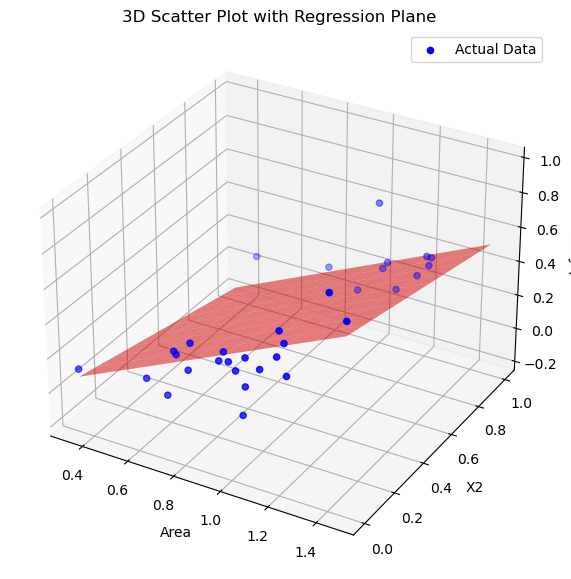

In [137]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Area'], df['X2'], y, color='blue', label='Actual Data')

x1_range = np.linspace(df['Area'].min(), df['Area'].max(), 10)
x2_range = np.linspace(df['X2'].min(), df['X2'].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

y_grid = beta[0] + beta[1] * x1_grid + beta[2] * x2_grid

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)

# Labels and title
ax.set_xlabel('Area')
ax.set_ylabel('X2')
ax.set_zlabel('Infarc')
ax.set_title('3D Scatter Plot with Regression Plane')

plt.legend()
plt.show()
